In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from six.moves import urllib
import os

In [4]:
#function to read the data
def load_data():
    data_path = "C:/Python Version"    
    
    customer_sat_path = os.path.join(data_path, "customer satisfaction.csv")
    product_data_path =  os.path.join(data_path, "products data csv.csv")
    
    customer_satisfaction = pd.read_csv(customer_sat_path, encoding='windows-1252')
    product_data = pd.read_csv(product_data_path, encoding='windows-1252')
    
    return(customer_satisfaction, product_data)

In [5]:
cust_sat, product_data= load_data()

In [6]:
cust_sat.head()

ProductId          UserId  Return  NPS  Score        Time  Day  Month  \
0  B001E4KFG0  A3SGXH7AUHU8GW       0    2      5  1303862400   27      2   
1  B00813GRG4  A1D87F6ZCVE5NK       1    2      1  1346976000    4      7   
2  B000LQOCH0   ABXLMWJIXXAIN       0    5      1  1219017600   22     10   
3  B000UA0QIQ  A395BORC6FGVXV       0    6      2  1307923200   18      6   
4  B006K2ZZ7K  A1UQRSCLF8GW1T       0    7      5  1350777600   28      2   

   Year  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  
0  2020         NaN          NaN          NaN          NaN  
1  2020         NaN          NaN          NaN          NaN  
2  2020         NaN          NaN          NaN          NaN  
3  2020         NaN          NaN          NaN          NaN  
4  2020         NaN          NaN          NaN          NaN

In [7]:
cust_sat= cust_sat.drop(columns=["Unnamed: 9","Unnamed: 10", "Unnamed: 11", "Unnamed: 12"])

In [8]:
cust_sat.head()

ProductId          UserId  Return  NPS  Score        Time  Day  Month  \
0  B001E4KFG0  A3SGXH7AUHU8GW       0    2      5  1303862400   27      2   
1  B00813GRG4  A1D87F6ZCVE5NK       1    2      1  1346976000    4      7   
2  B000LQOCH0   ABXLMWJIXXAIN       0    5      1  1219017600   22     10   
3  B000UA0QIQ  A395BORC6FGVXV       0    6      2  1307923200   18      6   
4  B006K2ZZ7K  A1UQRSCLF8GW1T       0    7      5  1350777600   28      2   

   Year  
0  2020  
1  2020  
2  2020  
3  2020  
4  2020

In [9]:
product_data.head()

ProductId     brand   price  prices.isSale  \
0     6641040     Sharp  126.93          False   
1  2734888454  Pyle Pro   73.48          False   
2  2841233731        WD   20.99          False   
3  7310172001     Niles  320.00          False   
4  7310172101      Sony  164.00          False   

                                        product.name  
0  Details About *new~sennheiser Hd 4.50 Btnc Wir...  
1  7.2CH AVR WITH WIFI _ BLUETOOTH 2 HDMI OUTPUTS...  
2  LG - 65 Class - OLED - B7A Series - 2160p - Sm...  
3  Details About Netgear Powerline 1000 Mbps Wifi...  
4       Expert Mouse Wireless Trackball || Dark cyan

In [230]:
customer_sat_concatenated = pd.merge(cust_sat,product_data,
                                     how='left',on = 'ProductId')
data = customer_sat_concatenated

In [166]:
data.head()

ProductId          UserId  Return  NPS  Score        Time  Day  Month  \
0  B001E4KFG0  A3SGXH7AUHU8GW       0    2      5  1303862400   27      2   
1  B00813GRG4  A1D87F6ZCVE5NK       1    2      1  1346976000    4      7   
2  B000LQOCH0   ABXLMWJIXXAIN       0    5      1  1219017600   22     10   
3  B000UA0QIQ  A395BORC6FGVXV       0    6      2  1307923200   18      6   
4  B006K2ZZ7K  A1UQRSCLF8GW1T       0    7      5  1350777600   28      2   

   Year    brand   price  prices.isSale  \
0  2020    Sanus  104.99          False   
1  2020  Boytone   69.00           True   
2  2020  Boytone   69.00          False   
3  2020  Boytone   69.99          False   
4  2020  Boytone   66.99          False   

                                        product.name  
0  1080p Day/Night PTZ Speed Dome Camera with 5 t...  
1  1080p Day/Night PTZ Speed Dome Camera with 5 t...  
2  1080p Day/Night PTZ Speed Dome Camera with 5 t...  
3  1080p Day/Night PTZ Speed Dome Camera with 5 t...  
4  1080p Day/Night PTZ Speed Dome Camera with 5 t...

In [167]:
data.describe()

Return            NPS          Score          Time  \
count  568454.000000  568454.000000  568454.000000  5.684540e+05   
mean        0.072194       5.498053       4.049888  1.296257e+09   
std         0.258809       2.872544       1.458757  4.804331e+07   
min         0.000000       1.000000       1.000000  9.393408e+08   
25%         0.000000       3.000000       3.000000  1.271290e+09   
50%         0.000000       5.000000       5.000000  1.311120e+09   
75%         0.000000       8.000000       5.000000  1.332720e+09   
max         1.000000      10.000000       5.000000  1.351210e+09   

                 Day          Month      Year          price  
count  568454.000000  568454.000000  568454.0  568454.000000  
mean       15.979896       6.508608    2020.0     312.442461  
std         8.906462       3.452925       0.0     576.055729  
min         1.000000       1.000000    2020.0       1.000000  
25%         8.000000       4.000000    2020.0      84.990000  
50%        16.000000       7.000000    2020.0     140.990000  
75%        24.000000      10.000000    2020.0     199.980000  
max        31.000000      12.000000    2020.0    6999.990000

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568454 entries, 0 to 568453
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ProductId      568454 non-null  object 
 1   UserId         568454 non-null  object 
 2   Return         568454 non-null  int64  
 3   NPS            568454 non-null  int64  
 4   Score          568454 non-null  int64  
 5   Time           568454 non-null  int64  
 6   Day            568454 non-null  int64  
 7   Month          568454 non-null  int64  
 8   Year           568454 non-null  int64  
 9   brand          568454 non-null  object 
 10  price          568454 non-null  float64
 11  prices.isSale  568454 non-null  bool   
 12  product.name   568454 non-null  object 
dtypes: bool(1), float64(1), int64(7), object(4)
memory usage: 56.9+ MB


In [169]:
#check if there is Nan Values 

cleaned = data.dropna()

# Verify if there is missing values
if len(cleaned) == len(data):
    print('There is no missing values!')
else:
    print('There is missing values')

There is no missing values!


In [170]:
#Check if there is dublicated values

dublicated_check = cleaned.duplicated()
#np.unique(dublicated_check.value_counts())

# Verify if there is dublicated values
if(len(cleaned) == len(np.unique(dublicated_check.value_counts()))):
    print('There is no dublicated values!')
else:
    print('There is dublicated values')

There is dublicated values


In [171]:
#avg_nps_perMonth = data['Month'], data['NPS']

In [172]:
#avg_nps_perMonth

In [173]:
#Overall satisfaction score month over month

data_averaged = data.groupby(['Month']).mean()

In [174]:
data_averaged

Return       NPS     Score          Time        Day    Year  \
Month                                                                  
1      0.070619  5.531864  4.159150  1.296264e+09  15.999705  2020.0   
2      0.073399  5.487586  4.151773  1.296493e+09  15.814769  2020.0   
3      0.071054  5.483891  3.730248  1.296432e+09  15.996564  2020.0   
4      0.073413  5.484660  4.151782  1.296437e+09  15.974780  2020.0   
5      0.071858  5.500760  4.150585  1.296079e+09  16.011106  2020.0   
6      0.071703  5.511409  4.162575  1.296109e+09  15.921296  2020.0   
7      0.074652  5.477838  3.724466  1.296098e+09  16.024877  2020.0   
8      0.071908  5.488938  4.161907  1.296038e+09  15.977124  2020.0   
9      0.072585  5.512444  4.144959  1.296240e+09  16.028925  2020.0   
10     0.069960  5.501067  3.746203  1.296377e+09  16.020088  2020.0   
11     0.071731  5.501469  4.158909  1.296352e+09  15.985142  2020.0   
12     0.073453  5.494532  4.151710  1.296161e+09  16.003772  2020.0   

            price  prices.isSale  
Month                             
1      314.643782       0.228294  
2      312.166583       0.226745  
3      314.333441       0.226738  
4      310.967259       0.228807  
5      312.488046       0.231324  
6      311.280130       0.229069  
7      312.790782       0.230573  
8      312.711660       0.225124  
9      313.409848       0.229883  
10     310.995051       0.230941  
11     311.572021       0.226170  
12     311.963544       0.229798

In [175]:
#checking values manually finds that jul is lowest month in aveage score

In [176]:
list(data_averaged)

['Return', 'NPS', 'Score', 'Time', 'Day', 'Year', 'price', 'prices.isSale']

In [177]:
year_Months =  ['Jan', 'Feb', 'Mar', 'Apr','May','Jun',
                  'Jul','Aug','Sep','Oct','Nov','Dec']
data_averaged['Month'] = year_Months
data_averaged

Return       NPS     Score          Time        Day    Year  \
Month                                                                  
1      0.070619  5.531864  4.159150  1.296264e+09  15.999705  2020.0   
2      0.073399  5.487586  4.151773  1.296493e+09  15.814769  2020.0   
3      0.071054  5.483891  3.730248  1.296432e+09  15.996564  2020.0   
4      0.073413  5.484660  4.151782  1.296437e+09  15.974780  2020.0   
5      0.071858  5.500760  4.150585  1.296079e+09  16.011106  2020.0   
6      0.071703  5.511409  4.162575  1.296109e+09  15.921296  2020.0   
7      0.074652  5.477838  3.724466  1.296098e+09  16.024877  2020.0   
8      0.071908  5.488938  4.161907  1.296038e+09  15.977124  2020.0   
9      0.072585  5.512444  4.144959  1.296240e+09  16.028925  2020.0   
10     0.069960  5.501067  3.746203  1.296377e+09  16.020088  2020.0   
11     0.071731  5.501469  4.158909  1.296352e+09  15.985142  2020.0   
12     0.073453  5.494532  4.151710  1.296161e+09  16.003772  2020.0   

            price  prices.isSale Month  
Month                                   
1      314.643782       0.228294   Jan  
2      312.166583       0.226745   Feb  
3      314.333441       0.226738   Mar  
4      310.967259       0.228807   Apr  
5      312.488046       0.231324   May  
6      311.280130       0.229069   Jun  
7      312.790782       0.230573   Jul  
8      312.711660       0.225124   Aug  
9      313.409848       0.229883   Sep  
10     310.995051       0.230941   Oct  
11     311.572021       0.226170   Nov  
12     311.963544       0.229798   Dec

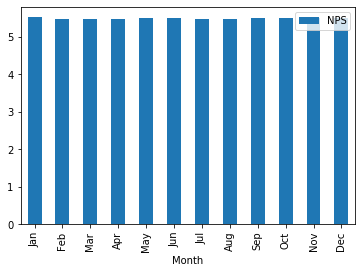

In [178]:
from pandas.plotting import scatter_matrix

data_averaged.plot(kind = 'bar', x ='Month',
           y = 'NPS')
#ax.legend(loc=”string”, bbox_to_anchor=(x,y))

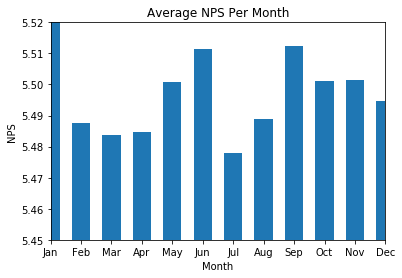

In [179]:
from matplotlib import pyplot as plt


# create a line chart, years on x-axis, gdp on y-axis
plt.bar(data_averaged['Month'], data_averaged['NPS'],0.6)
plt.axis(['Jan', 'Dec', 5.45,5.52])
# add a title
plt.title("Average NPS Per Month")

# add a label to the y-axis
plt.ylabel("NPS")
plt.xlabel("Month")

plt.show()

In [180]:
list(data_averaged)

['Return',
 'NPS',
 'Score',
 'Time',
 'Day',
 'Year',
 'price',
 'prices.isSale',
 'Month']

In [181]:
list(data)

['ProductId',
 'UserId',
 'Return',
 'NPS',
 'Score',
 'Time',
 'Day',
 'Month',
 'Year',
 'brand',
 'price',
 'prices.isSale',
 'product.name']

In [182]:
#2- Months with highest/lowest score

#average_month_score = data_averaged.groupby(['Month']).mean()
#average_month_score

In [183]:
list(data_averaged)

['Return',
 'NPS',
 'Score',
 'Time',
 'Day',
 'Year',
 'price',
 'prices.isSale',
 'Month']

In [184]:
data_averaged

Return       NPS     Score          Time        Day    Year  \
Month                                                                  
1      0.070619  5.531864  4.159150  1.296264e+09  15.999705  2020.0   
2      0.073399  5.487586  4.151773  1.296493e+09  15.814769  2020.0   
3      0.071054  5.483891  3.730248  1.296432e+09  15.996564  2020.0   
4      0.073413  5.484660  4.151782  1.296437e+09  15.974780  2020.0   
5      0.071858  5.500760  4.150585  1.296079e+09  16.011106  2020.0   
6      0.071703  5.511409  4.162575  1.296109e+09  15.921296  2020.0   
7      0.074652  5.477838  3.724466  1.296098e+09  16.024877  2020.0   
8      0.071908  5.488938  4.161907  1.296038e+09  15.977124  2020.0   
9      0.072585  5.512444  4.144959  1.296240e+09  16.028925  2020.0   
10     0.069960  5.501067  3.746203  1.296377e+09  16.020088  2020.0   
11     0.071731  5.501469  4.158909  1.296352e+09  15.985142  2020.0   
12     0.073453  5.494532  4.151710  1.296161e+09  16.003772  2020.0   

            price  prices.isSale Month  
Month                                   
1      314.643782       0.228294   Jan  
2      312.166583       0.226745   Feb  
3      314.333441       0.226738   Mar  
4      310.967259       0.228807   Apr  
5      312.488046       0.231324   May  
6      311.280130       0.229069   Jun  
7      312.790782       0.230573   Jul  
8      312.711660       0.225124   Aug  
9      313.409848       0.229883   Sep  
10     310.995051       0.230941   Oct  
11     311.572021       0.226170   Nov  
12     311.963544       0.229798   Dec

In [185]:
#2- Months with highest/lowest score

#re-adding months columns to the data
data_averaged['Month'] = year_Months

#Getting month with highest score 
max_Month = data_averaged['Score'].max()

#Getting month with lowest score
min_Month = data_averaged['Score'].min()



max_score_month = data_averaged.loc[data_averaged['Score'] == max_Month,['Month']]
min_score_month = data_averaged.loc[data_averaged['Score'] == min_Month,['Month']]


print( max_score_month['Month'])
print( min_score_month['Month'])


Month
6    Jun
Name: Month, dtype: object
Month
7    Jul
Name: Month, dtype: object


In [186]:
#Question3: Reasons of dissatisfaction score



In [192]:
#Splitting data into returned and nonreturned
data_with_return = data.loc[data['Return'] == 1]
data_without_return = data.loc[data['Return'] == 0]

print("Length of all data" , len(data))
print("length of data splited", len(data_with_return) +
      len(data_without_return))

Length of all data 568454
length of data splited 568454


In [193]:
#takeing average score per month
data_with_return = data_with_return.groupby(['Month']).mean()
data_without_return = data_without_return.groupby(['Month']).mean()

#adding a new columns with months names 
data_with_return['Month'] = year_Months
data_without_return['Month'] = year_Months


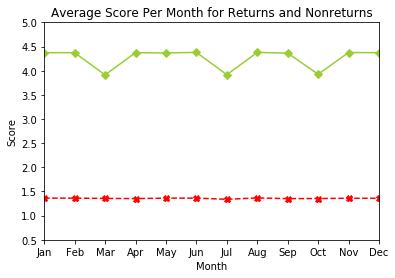

In [196]:
# create a line chart, years on x-axis, gdp on y-axis
plt.plot(data_without_return['Month'], data_without_return['Score'],
         color = 'yellowgreen',linestyle = '-', marker = 'D')
plt.plot(data_without_return['Month'], data_with_return['Score'],
         color = 'red',linestyle = '--', marker = 'X')

plt.axis(['Jan', 'Dec', 0.5,5])

# add a title
plt.title("Average Score Per Month for Returns and Nonreturns")

# add a label to the y-axis
plt.ylabel("Score")
plt.xlabel("Month")

plt.show()



In [217]:
data_corr = data.loc[data['Score'] <= 3]
data_corr

ProductId          UserId  Return  NPS  Score        Time  Day  \
1       B00813GRG4  A1D87F6ZCVE5NK       1    2      1  1346976000    4   
2       B000LQOCH0   ABXLMWJIXXAIN       0    5      1  1219017600   22   
3       B000UA0QIQ  A395BORC6FGVXV       0    6      2  1307923200   18   
12      B0009XLVG0   A327PCT23YH90       0    8      1  1339545600   10   
13      B001GVISJM  A18ECVX2RJ7HUE       0    1      1  1288915200   20   
...            ...             ...     ...  ...    ...         ...  ...   
568433  B003XUL27E  A1JUG9WCN1A52Z       1    4      1  1311638400   24   
568434  B003XUL27E   ABGQPE97ZVYJ3       1    5      2  1306368000   17   
568435  B003XUL27E  A2PSB4WQHH46HN       0    9      2  1285718400   22   
568446  B001EO7N10  A2P9W8T7NTLG2Z       1    2      2  1328918400   28   
568450  B003S1WTCU  A3I8AFVPEE8KI5       0   10      2  1331251200   17   

        Month  Year    brand   price  prices.isSale  \
1           7  2020  Boytone   69.00           True   
2          10  2020  Boytone   69.00          False   
3           6  2020  Boytone   69.99          False   
12         11  2020  Boytone   69.99          False   
13         10  2020  Boytone   69.00           True   
...       ...   ...      ...     ...            ...   
568433      9  2020   Lenovo  179.00           True   
568434      1  2020   Lenovo  179.00           True   
568435      3  2020   Lenovo  179.00           True   
568446     12  2020      Pny   96.00          False   
568450     10  2020      Pny  140.00          False   

                                             product.name  
1       1080p Day/Night PTZ Speed Dome Camera with 5 t...  
2       1080p Day/Night PTZ Speed Dome Camera with 5 t...  
3       1080p Day/Night PTZ Speed Dome Camera with 5 t...  
12      1080p Day/Night PTZ Speed Dome Camera with 5 t...  
13      1080p Day/Night PTZ Speed Dome Camera with 5 t...  
...                                                   ...  
568433          SVS - 12 500W Powered Subwoofer -  || red  
568434          SVS - 12 500W Powered Subwoofer -  || red  
568435          SVS - 12 500W Powered Subwoofer -  || red  
568446       SVS - 12 500W Powered Subwoofer -  || Yellow  
568450   SVS - 12 800W Powered Subwoofer -  || acid green  

[148513 rows x 13 columns]

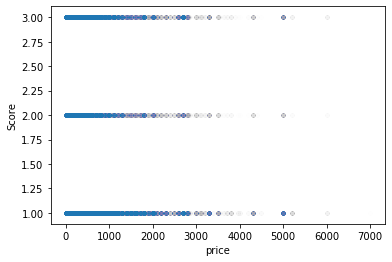

In [218]:
# There is a correlation between 
#Score and the Sales
from pandas.plotting import scatter_matrix

data_corr.plot(kind = 'scatter', x = 'price',
           y = 'Score', alpha = 0.002)

In [ ]:
#there is no relation between price and score

In [219]:
data_corr['Month']

1          7
2         10
3          6
12        11
13        10
          ..
568433     9
568434     1
568435     3
568446    12
568450    10
Name: Month, Length: 148513, dtype: int64

In [221]:
len(data_corr)

148513

In [222]:
data_corr

ProductId          UserId  Return  NPS  Score        Time  Day  \
1       B00813GRG4  A1D87F6ZCVE5NK       1    2      1  1346976000    4   
2       B000LQOCH0   ABXLMWJIXXAIN       0    5      1  1219017600   22   
3       B000UA0QIQ  A395BORC6FGVXV       0    6      2  1307923200   18   
12      B0009XLVG0   A327PCT23YH90       0    8      1  1339545600   10   
13      B001GVISJM  A18ECVX2RJ7HUE       0    1      1  1288915200   20   
...            ...             ...     ...  ...    ...         ...  ...   
568433  B003XUL27E  A1JUG9WCN1A52Z       1    4      1  1311638400   24   
568434  B003XUL27E   ABGQPE97ZVYJ3       1    5      2  1306368000   17   
568435  B003XUL27E  A2PSB4WQHH46HN       0    9      2  1285718400   22   
568446  B001EO7N10  A2P9W8T7NTLG2Z       1    2      2  1328918400   28   
568450  B003S1WTCU  A3I8AFVPEE8KI5       0   10      2  1331251200   17   

        Month  Year    brand   price  prices.isSale  \
1           7  2020  Boytone   69.00           True   
2          10  2020  Boytone   69.00          False   
3           6  2020  Boytone   69.99          False   
12         11  2020  Boytone   69.99          False   
13         10  2020  Boytone   69.00           True   
...       ...   ...      ...     ...            ...   
568433      9  2020   Lenovo  179.00           True   
568434      1  2020   Lenovo  179.00           True   
568435      3  2020   Lenovo  179.00           True   
568446     12  2020      Pny   96.00          False   
568450     10  2020      Pny  140.00          False   

                                             product.name  
1       1080p Day/Night PTZ Speed Dome Camera with 5 t...  
2       1080p Day/Night PTZ Speed Dome Camera with 5 t...  
3       1080p Day/Night PTZ Speed Dome Camera with 5 t...  
12      1080p Day/Night PTZ Speed Dome Camera with 5 t...  
13      1080p Day/Night PTZ Speed Dome Camera with 5 t...  
...                                                   ...  
568433          SVS - 12 500W Powered Subwoofer -  || red  
568434          SVS - 12 500W Powered Subwoofer -  || red  
568435          SVS - 12 500W Powered Subwoofer -  || red  
568446       SVS - 12 500W Powered Subwoofer -  || Yellow  
568450   SVS - 12 800W Powered Subwoofer -  || acid green  

[148513 rows x 13 columns]

In [224]:
#data_corr['Month'] = year_Months
#data_corr
#adding 12 char values of months to 148513 rows can't be done 

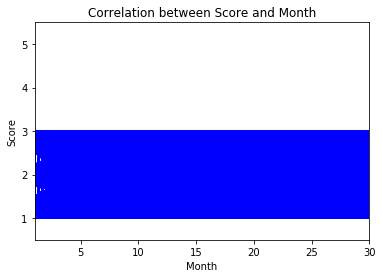

In [227]:


plt.plot(data_corr['Day'], data_corr['Score'],
         color = 'blue',linestyle = '-')

plt.axis([1,30, 0.5,5.5])

# add a title
plt.title("Correlation between Score and Month")

# add a label to the y-axis
plt.ylabel("Score")
plt.xlabel("Month")

plt.show()


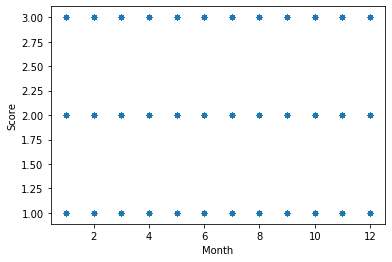

In [229]:
from pandas.plotting import scatter_matrix

data_corr.plot(kind = 'scatter', x = 'Month',
           y = 'Score', alpha = 0.02)

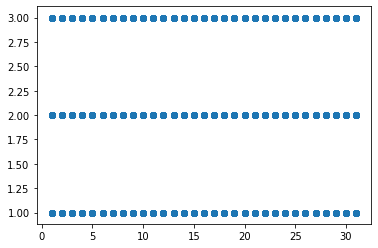

In [228]:

plt.scatter(data_corr['Day'], data_corr['Score'])
plt.show()

In [256]:
#4 Question- Percentage of promoter customers/month

q4_data = data.loc[(data['Return']==0) & (data['NPS']>=8)]
q4_all_data_averaged = data.groupby(['Month']).mean()

In [257]:
q4_data

ProductId          UserId  Return  NPS  Score        Time  Day  \
6       B006K2ZZ7K  A1SP2KVKFXXRU1       0    8      5  1340150400   23   
9       B00171APVA  A21BT40VZCCYT4       0    9      5  1351209600   23   
11      B0009XLVG0  A2725IB4YY9JEB       0    8      5  1282867200   26   
12      B0009XLVG0   A327PCT23YH90       0    8      1  1339545600   10   
15      B001GVISJM  A1CZX3CP8IKQIJ       0    9      5  1262044800   18   
...            ...             ...     ...  ...    ...         ...  ...   
568442  B006T7TKZO  A3BOURUK79CYY5       0    8      5  1338854400   27   
568445  B001EO7N10  A2E5C8TTAED4CQ       0    8      5  1268006400   24   
568447  B001EO7N10   APWCOAVILK94B       0    9      5  1322524800   18   
568450  B003S1WTCU  A3I8AFVPEE8KI5       0   10      2  1331251200   17   
568452  B004I613EE   A3IBEVCTXKNOH       0    8      5  1331596800   27   

        Month  Year    brand   price  prices.isSale  \
6           7  2020  Boytone   66.99          False   
9          10  2020  Boytone   74.99          False   
11          8  2020  Boytone   69.99          False   
12         11  2020  Boytone   69.99          False   
15          5  2020  Boytone   69.00           True   
...       ...   ...      ...     ...            ...   
568442     10  2020      Pny  156.00          False   
568445      1  2020      Pny   96.00          False   
568447     10  2020      Pny   96.00          False   
568450     10  2020      Pny  140.00          False   
568452      4  2020      Pny  171.00          False   

                                             product.name  
6       1080p Day/Night PTZ Speed Dome Camera with 5 t...  
9       1080p Day/Night PTZ Speed Dome Camera with 5 t...  
11      1080p Day/Night PTZ Speed Dome Camera with 5 t...  
12      1080p Day/Night PTZ Speed Dome Camera with 5 t...  
15      1080p Day/Night PTZ Speed Dome Camera with 5 t...  
...                                                   ...  
568442        SVS - 12 500W Powered Subwoofer -  || White  
568445       SVS - 12 500W Powered Subwoofer -  || Yellow  
568447       SVS - 12 500W Powered Subwoofer -  || Yellow  
568450   SVS - 12 800W Powered Subwoofer -  || acid green  
568452   SVS - 12 800W Powered Subwoofer -  || Acid Green  

[170122 rows x 13 columns]

In [258]:
len(q4_data)

170122

In [259]:
q4_promoter_data_averaged = q4_data.groupby(['Month']).mean()

In [260]:
q4_promoter_data_averaged

Return       NPS     Score          Time        Day    Year  \
Month                                                                
1         0.0  9.006406  4.161061  1.296031e+09  15.937261  2020.0   
2         0.0  9.006736  4.141813  1.296288e+09  15.854962  2020.0   
3         0.0  8.993747  3.712073  1.296278e+09  15.977261  2020.0   
4         0.0  9.000422  4.155221  1.296159e+09  16.026457  2020.0   
5         0.0  9.003933  4.135278  1.295628e+09  15.876805  2020.0   
6         0.0  9.008967  4.150193  1.296282e+09  15.920280  2020.0   
7         0.0  8.999785  3.752345  1.295823e+09  15.967414  2020.0   
8         0.0  9.007163  4.165040  1.295874e+09  15.995154  2020.0   
9         0.0  9.004284  4.151145  1.296718e+09  15.979140  2020.0   
10        0.0  9.005000  3.730845  1.296511e+09  15.988169  2020.0   
11        0.0  9.000069  4.153211  1.296644e+09  15.911420  2020.0   
12        0.0  8.995076  4.147661  1.296664e+09  15.989448  2020.0   

            price  prices.isSale  
Month                             
1      319.596762       0.226238  
2      317.788709       0.232032  
3      309.664720       0.228665  
4      312.716910       0.234942  
5      309.264414       0.232518  
6      309.440050       0.232434  
7      308.549283       0.229034  
8      312.351853       0.227404  
9      315.385471       0.229737  
10     314.311723       0.228239  
11     314.367133       0.230337  
12     313.973415       0.227858

In [261]:
promoter_per = q4_promoter_data_averaged['NPS']/q4_all_data_averaged['NPS']

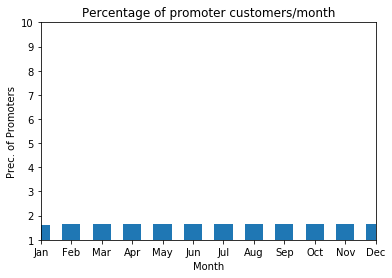

In [262]:
# create a line chart, years on x-axis, gdp on y-axis
plt.bar(year_Months, promoter_per,0.6)
plt.axis(['Jan', 'Dec', 1,10])
# add a title
plt.title("Percentage of promoter customers/month")

# add a label to the y-axis
plt.ylabel("Prec. of Promoters")
plt.xlabel("Month")

plt.show()

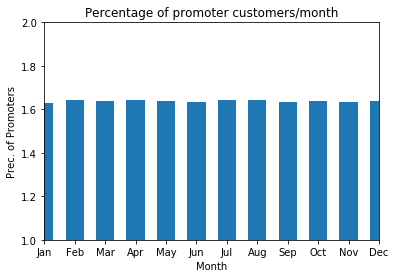

In [263]:
# create a line chart, years on x-axis, gdp on y-axis
plt.bar(year_Months, promoter_per,0.6)
plt.axis(['Jan', 'Dec', 1,2])
# add a title
plt.title("Percentage of promoter customers/month")

# add a label to the y-axis
plt.ylabel("Prec. of Promoters")
plt.xlabel("Month")

plt.show()

In [264]:
#Question 5 getting The revenue trend


q5_revenue = data.groupby(['Month']).sum()

In [265]:
q5_revenue

Return     NPS   Score            Time     Day      Year         price  \
Month                                                                           
1        3351  262498  197360  61510321296000  759218  95853040  1.493048e+07   
2        3453  258158  195316  60992196825600  743990  95028880  1.468556e+07   
3        3350  258549  175870  61122880108800  754190  95236940  1.481988e+07   
4        3496  261185  197712  61737624662400  760735  96194420  1.480857e+07   
5        3358  257056  193961  60567060873600  748215  94396620  1.460288e+07   
6        3400  261340  197381  61458891955200  754956  95784360  1.476028e+07   
7        3520  258291  175616  61113610512000  755605  95247040  1.474871e+07   
8        3442  262739  199218  62037471628800  764777  96691340  1.496857e+07   
9        3453  262238  197184  61664722588800  762528  96095440  1.490953e+07   
10       3312  260426  177349  61371774489600  758407  95628820  1.472282e+07   
11       3418  262145  198172  61771169894400  761692  96253000  1.484641e+07   
12       3486  260765  197036  61514527248000  759523  95867180  1.480548e+07   

       prices.isSale  
Month                 
1            10833.0  
2            10667.0  
3            10690.0  
4            10896.0  
5            10810.0  
6            10862.0  
7            10872.0  
8            10776.0  
9            10936.0  
10           10933.0  
11           10777.0  
12           10906.0

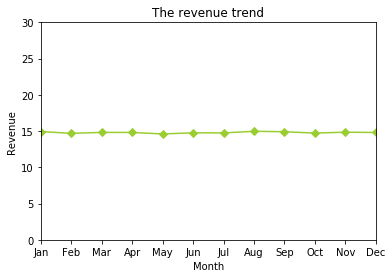

In [271]:
# create a line chart, years on x-axis, gdp on y-axis
plt.plot(year_Months, q5_revenue['price']/1000000,
         color = 'yellowgreen',linestyle = '-', marker = 'D')


plt.axis(['Jan', 'Dec', 0,30])

# add a title
plt.title("The revenue trend")

# add a label to the y-axis
plt.ylabel("Revenue")
plt.xlabel("Month")

plt.show()



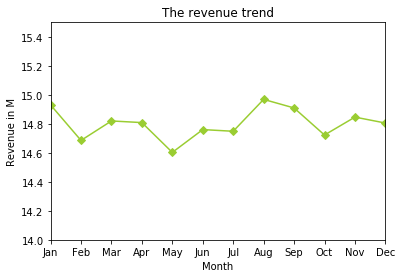

In [279]:
# create a line chart, years on x-axis, gdp on y-axis
plt.plot(year_Months, q5_revenue['price']/1000000,
         color = 'yellowgreen',linestyle = '-', marker = 'D')


plt.axis(['Jan', 'Dec', 14,15.5])

# add a title
plt.title("The revenue trend")

# add a label to the y-axis
plt.ylabel("Revenue in M")
plt.xlabel("Month")

plt.show()